# Proyección de ganancias de un casino utilizando Simulación Montecarlo 

### 1.2 Introducción

Los juegos de azar han acompañado al ser humano por un largo período de tiempo pues se han visto dados desde el egipto faraónico alrededor del 2000 A.C. y registros en China aproximadamente mil años antes que los egipcios. Los romanos eran unos apasionados por los dados y otros juegos de azar, de ellos heredamos la palabra aleatorio que hoy usamos que proviene de *aleator* que se refiere a jugador. Otro ejemplo de esas herencias culturales ha sido la frase de Julio César *alea iacta est* que significa la suerte está echada. 

A los humanos a lo largo de historia nos ha llamado la atención este tipo de juegos mezclando la suerte y en algunos casos la estrategia y por eso la probabilidad en un principio fue diseñada para resolver precisamente los problemas de los juegos de azar siendo el ejemplo de esto el caso de Pascal y Pierre de Fermat. Se han convertido ya en toda una industria a través de los casinos físicos y ahora con el avance de la tecnología en casinos digitales que recauda una gran cantidad de dinero. Y en Estados Unidos es una industria que ha crecido conforme el tiempo como así lo muestran los datos de la Reserva Federal.

Es importante que los casinos tengan una ligera ventaja en los juegos para que sean redituables por lo que un análisis adecuado de los juegos y de las condiciones marcaran la diferencia entre ganar dinero y la quiebra por ello la simulación matemática resulta ser una herramienta adecuada que permite obtener resultados sin tener que desembolsar dinero.

El siguiente trabajo pone en practica los conocimientos vistos en la materia de simulación matematica y resolver un problema de simulación en donde por medio de la Simulación Monte Carlo se obtengan previsiones de las ganancias de un casino en distintos juegos clásicos propuestos.
![](https://static3.abc.es/media/historia/2018/08/29/dados-juego-azar-k7JI--620x349@abc.jpg)


In [9]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd

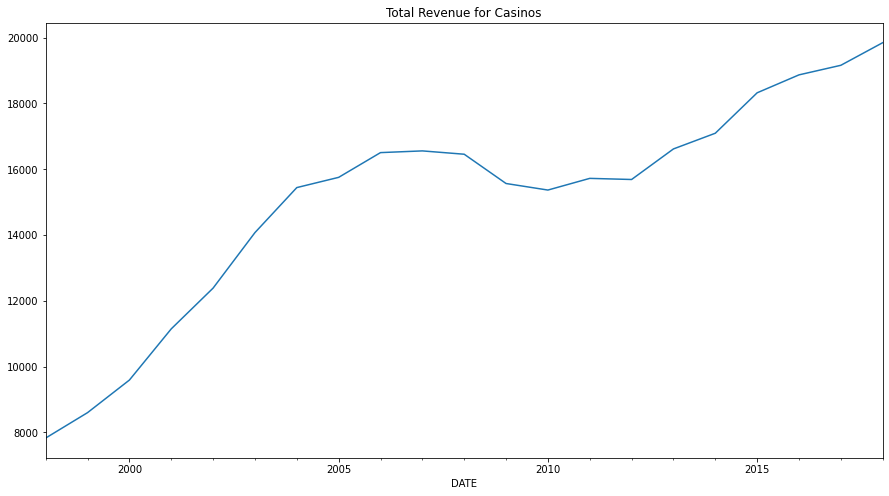

In [14]:
cas = web.DataReader("REVEF71321TAXABL", "fred",start = "1998-01-01", end = "2018-01-01" )
cas.plot(figsize=(15,8),legend=False, title = "Total Revenue for Casinos")

### 1.3 Objetivos.
> #### 1.3.1 Objetivo general.
> Proyectar las ganancias de un casino tomando en cuenta los juegos de azar
> #### 1.3.2 Objetivos específicos
>  - Desarrolar los juegos de azar que sean los apropiados conforme al análisis de los problemas.
>  - Definir la simulación Monte Carlo que se adecue al problema.
>  - Simular distintos escenarios
>  - Crear una base de datos con los resultados de la simulación
>  - Analizar los resultados para ver las ganancias del casino

### 1.4 Modelo que representa el problema
Se puede definir el problema como la simulación Montecarlo en donde se evalua a cada jugador como una caminata aleatoria y las ganancias del casino como:
$$GT =\sum_{h=1}^{m} G_i(h)$$
siendo m el número de días y a su vez cada juego como:
$$G_i(h)=\sum_{k=1}^{y} X(s)$$
donde $y$ es el número de jugadores cada día por juego, $X(s)$ son las ganancias de cada jugador despues de un determinado numero de veces jugado de ese juego.

Podemos pues definir a cada jugador como una caminata aleatoria que cumple lo siguiente:
$$X(t+r)=X(t)+\phi(r)$$
$$X(0)=0$$
siendo $X(t)$ la ganancia en el numero de juego $t$ 

Donde $\phi(r)$ es una variable aleatoria 
$$\phi :\Omega \rightarrow \mathbb{R}$$
para cada juego el espacio muestral $\Omega$ y $\phi(r)$ son distintos  
y siendo el dominio de $\Omega$ un numero finito y discreto y n el número de elementos que lo conforman cumplen lo siguiente:
$$\forall r:P(r)=\frac{1}{n}$$
$$\sum_{r=1}^{n} P(r)=1$$

### 1.5 Solución del problema
![](https://cdn.diferenciador.com/imagenes/diferencia-entre-suerte-y-azar-og.jpg)


In [54]:
import random
import numpy as np

#### Slot machine o maquina tragamonedas
Dentro de la legislación estadounidense se distinguen 3 tipos de juegos y dentro de las cuales pueden caer las maquinas tragamonedas, los juegos de tipo II y los juegos de tipo III, en los primeros la casa se queda con un porcentaje de las ganancias y el premio otorgado por la maquina es en base a las ganancias obtenidas de los jugadores previos. En los de tipo III el juego es completamente al azar por lo que cada carrete de la maquina es independiente de los demás.

![](https://image.freepik.com/vector-gratis/letras-grandes-triunfos-siete-maquinas-tragamonedas-afortunadas-monedas-oro-voladoras_1262-12756.jpg)

**Suposiciones:**
>  - Cada uno de los carretes es independiente
>  - Los carretes no estan desbalanceados por lo que cada uno tiene una distribución uniforme
>  - El orden de los carretes importa por lo que no es lo mismo una combinación A,A,B que B,A,A
>  - La maquina solamente cuenta con 3 carretes y cada carrete tiene 7 simbolos cada uno
>  - El jugador no puede influenciar de alguna manera el juego

Las combinaciones posibles para un juego de tales caracteristicas es equivalente a multiplicar 7 x 7 x 7 o lo que es lo mismo que 7^3 en la siguiente linea de codigo se puede observar las combinaciones posibles

In [3]:
s = []
for i in range(7):
    for e in range(7):
        for x in range(7):
            n = (i+1)*100+(e+1)*10+(x+1)
            s.append(n)
for i in s:
    print(i,end= " ")

111 112 113 114 115 116 117 121 122 123 124 125 126 127 131 132 133 134 135 136 137 141 142 143 144 145 146 147 151 152 153 154 155 156 157 161 162 163 164 165 166 167 171 172 173 174 175 176 177 211 212 213 214 215 216 217 221 222 223 224 225 226 227 231 232 233 234 235 236 237 241 242 243 244 245 246 247 251 252 253 254 255 256 257 261 262 263 264 265 266 267 271 272 273 274 275 276 277 311 312 313 314 315 316 317 321 322 323 324 325 326 327 331 332 333 334 335 336 337 341 342 343 344 345 346 347 351 352 353 354 355 356 357 361 362 363 364 365 366 367 371 372 373 374 375 376 377 411 412 413 414 415 416 417 421 422 423 424 425 426 427 431 432 433 434 435 436 437 441 442 443 444 445 446 447 451 452 453 454 455 456 457 461 462 463 464 465 466 467 471 472 473 474 475 476 477 511 512 513 514 515 516 517 521 522 523 524 525 526 527 531 532 533 534 535 536 537 541 542 543 544 545 546 547 551 552 553 554 555 556 557 561 562 563 564 565 566 567 571 572 573 574 575 576 577 611 612 613 614 615 

Aunque el juego podría plantearse como la combinación de la elección de 3 numeros aleatorios esto haría que computacionalmente fuera más pesado de procesar y que con la simulación Montecarlo resultará en un proceso tardado por lo que se considerara como el juego sacando un numero aleatorio entre 343 posibles de los cuales solamente 1 sera ganador del premio mayor

Podemos pues definir a cada jugador como una caminata aleatoria definida como:
$$X(t+r)=X(t)+\phi(r)$$
$$X(0)=0$$
donde $\phi(r)$ es una variable aleatoria 
$$\phi :\Omega \rightarrow \mathbb{R}$$
sujeta a :
 $$\phi(r)=\begin{pmatrix}100 & & r=1\\
75 & & r=2 \\
50 & & r=3 \\
25 & & r=4 \\
10 & & r=5 \\
5 & & r=6 \\
5 & & r=7 \\
-1 & & r\leq 8 \end{pmatrix}$$
y siendo el dominio de $\Omega$ los numeros comprendidos entre 1 y 343
$$\forall r:P(r)=\frac{1}{n}=\frac{1}{343}$$
$$\sum_{r=1} P(r)=1$$

In [5]:
def slot():
    return random.randint(1,343)

In [28]:
def juego_slot():
    tirada = slot()
    if tirada == 1:
        return 100
    elif tirada == 2:
        return 75
    elif tirada == 3:
        return 50
    elif tirada == 4:
        return 25
    elif tirada == 5:
        return 10
    elif tirada == 6:
        return 5
    elif tirada == 7:
        return 5
    else:
        return -1

In [94]:
def jugador_slot_g(n):
    capital = [0]
    for i in range(n):
        jugada = juego_slot()
        capital.append(capital[-1]+jugada)
    return capital
    

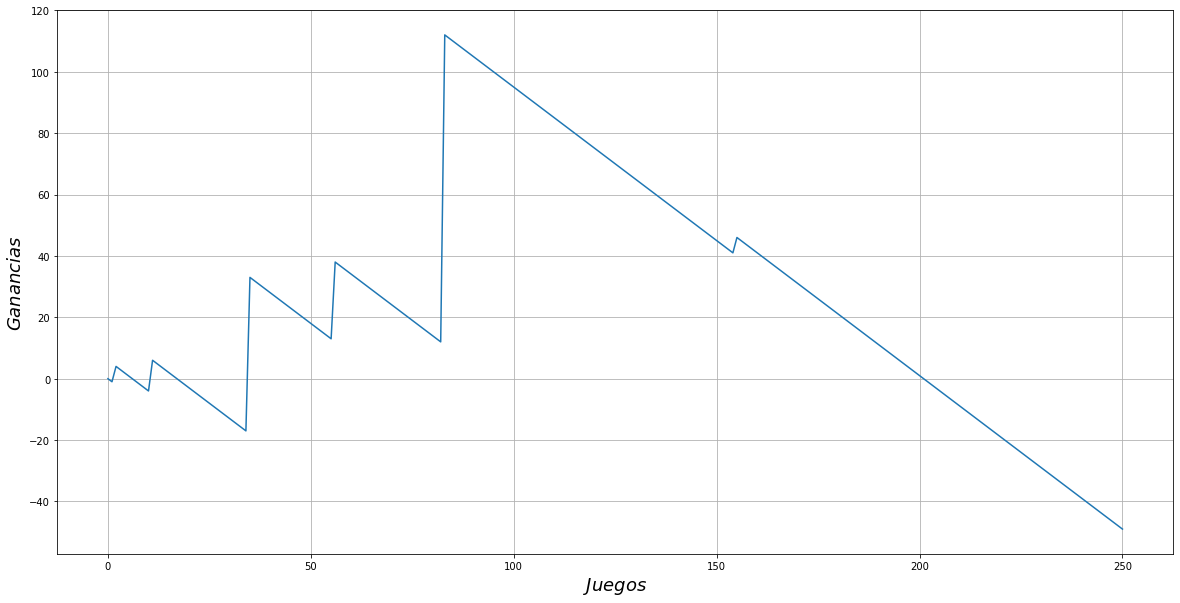

In [100]:
z=jugador_slot_g(250)
plt.figure(figsize=(20,10))
plt.plot(z)
plt.xlabel("$Juegos$",fontsize = 18)
plt.ylabel("$Ganancias$",fontsize = 18)
plt.grid()
plt.show()

In [73]:
def jugador_slot_f(n):
    capital = 0
    for i in range(n):
        jugada = juego_slot()
        capital += jugada
    return capital

def sim_slot(pasos,n):
    fondo = []
    for i in range(n):
        fondo.append(jugador_slot_f(pasos))
    return fondo

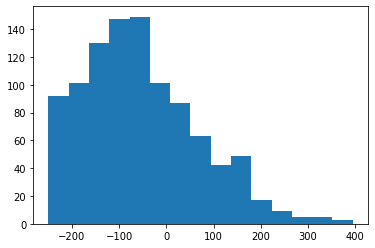

In [82]:
x = sim_slot(250,1000)
plt.hist(x, bins = 15, density = False)
plt.show()

In [105]:
x = sim_slot(250,1000)
x = np.array(x)
xt = np.sum(x)
xt

-39685

In [114]:
def anual_slot(pasos,n):
    anual = []
    for i in range(365):
        x = sim_slot(pasos,n)
        x = np.array(x)
        xt = -np.sum(x)
        anual.append(xt)
    return anual

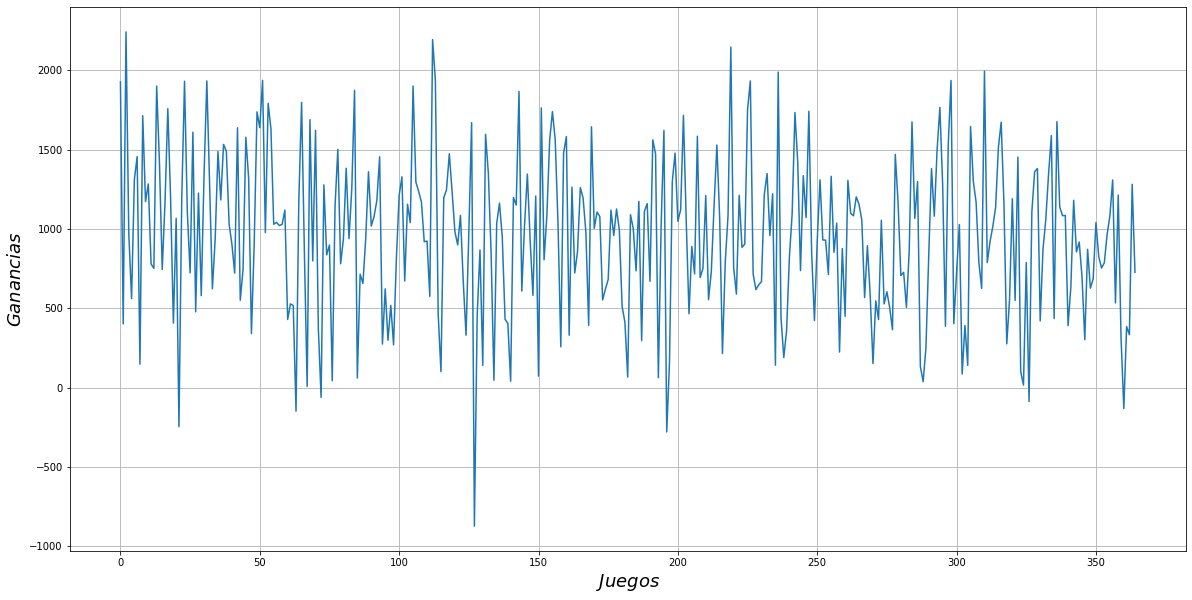

In [116]:
z=anual_slot(50,100)
plt.figure(figsize=(20,10))
plt.plot(z)
plt.xlabel("$Juegos$",fontsize = 18)
plt.ylabel("$Ganancias$",fontsize = 18)
plt.grid()
plt.show()

In [119]:
z = np.array(z)
zt = np.sum(z)
zt

350085

### 1.5 Visualización de la solución 


### 1.6 Conclusiones.


### 1.7 Referencias.
> ABC Historia. (31 de Agosto 2018). El azar y el vicio por el juego de los dados, la gran adicción que obnubiló a Octavio Augusto.ABC. Recuperado de https://www.abc.es/historia/abci-azar-y-vicio-juego-dados-gran-adiccion-obnubilo-octavio-augusto-201808310036_noticia.html?ref=https:%2F%2Fwww.google.com%2F#disqus_thread   
> Restrepo B, Luis F, & González L, Julián (2003). La Historia de la Probabilidad. Revista Colombiana de Ciencias Pecuarias, 16(1),83-87.[fecha de Consulta 9 de Noviembre de 2020]. ISSN: 0120-0690. Disponible en:   https://www.redalyc.org/articulo.oa?id=2950/295026121011